# Using Scikit-Learn to identify the line of business of a loss triangle
We would like to know whether we can use Machine Learning to predict the line of business of a triangle from just the triangle itself.  We will download the *CAS loss reserve database* for Medical Malpractice, Private Passenger Auto, and Workers' Compensation. 

In this notebook we will explore some of the tooling available in scikit-learn to do this, and as we learn about `sklearn` we will simultanously answer this question.

But first, let's use `pandas` to grab the data of the 19 largest carriers for each line of business, and group the remaining carriers as 'Other'.

# The Data

In [1]:
import pandas as pd
import numpy as np

import pandas as pd
ldf = pd.read_csv(
    r'https://raw.githubusercontent.com/PirateGrunt/paw_rpm/master/notebooks/assets/links.csv',
    index_col=['GRNAME','LOB'])
ldf.head(3)

,,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10
GRNAME,LOB,,,,,,,,,
Alaska Nat Ins Co,wkcomp,2.042044,1.204090,1.078956,1.039735,1.019448,1.014162,1.007755,1.006170,1.001740
Allstate Ins Co Grp,wkcomp,2.222958,1.337730,1.158433,1.092734,1.058643,1.045544,1.031408,1.036089,1.010920
Amerisafe Grp,wkcomp,2.083829,1.230349,1.049066,1.015398,1.011420,1.006666,1.007410,1.011116,1.013069


# What is Scikit-Learn?

**Machine Learning in Python**

* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license


#### scikit-learn covers the majority of supervised and unsupervised ML techniques available today and  is continually expanding
![](https://scikit-learn.org/stable/_static/ml_map.png)

`sklearn` is the defacto standard Machine Learning API for Python.  Other libraries yield to the simplicity of its API. 

![](https://github.com/PirateGrunt/paw_rpm/blob/master/notebooks/assets/one_api.png?raw=true)

* Want to do some Keras Deep learning?  No problem, just use `keras.wrappers.scikit_learn`
* XGBoost anyone?  Use: `xgboost.sklearn`
* Don't want to learn the syntax for the Light GBM? `lightgbm.sklearn` to the rescue.
* Natural langauge processing requires unique functionality, right? Nope, `nltk.classify.scikitlearn`


##### Scikit-learn is a consistent API for all Machine Learning Algorithms

Estimators are the building block of scikit-learn.  Almost everything is an estimator.  All estimators have `fit()` methods. Most have either a `predict()` or `transform()` method. Supervised techniques generally have a `score()` method as well.

The basic ML workflow looks like this:
```python
from sklearn.EstimatorFamily import Estimator
est = Estimator(hyperparameter_1, ... ,hyperparameter_n) # Create a model
est.fit(X_train, y_train) # Fit the model
est.score(X_test, y_test) # Evaluate model efficacy
est.predict(X_test) # Create predictions
```

##### Importing your estimators
`from sklearn.EstimatorFamily import Estimator` is typically how you'd import an estimator.  Some examples are:
``` python
from sklearn.linear_model import RidgeRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
```

In [0]:
# Exercise - Import the support vector classifier and a k-neighbors classifier
# from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

##### Hyperparameters of your estimarors (Controlling how your estimator fits)
Instantiating an estimator typically looks like `est = Estimator(hyperparameter_1, ... ,hyperparameter_n)`.
Upon instantition you have the *option* of setting hyperparameters (i.e. parameters whose values are set before the learning process).  All hyperparameters have defaults that may or may not be satisfactory for your particular problem.

Exmaples of setting initial hyperparameters on an estimator:
```python
rr = RidgeRegression(alpha=0.5, fit_intercept=False, normalize=True)
knc = KNeighborsClassifier(n_neighbors=10)
gbc = GradientBoostingClassifier()
```

In [3]:
# Exercise - Override the SVC hyperparameters such that it uses a kernel type
# of a second degree polynomial
SVC(kernel='poly', degree=2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

##### Transformers - a special kind of estimator
Several `sklearn` estimators implement a `transform()` method.  Transformers are typically used to 'transform' your featureset in a way that will improve another algorithms (e.g. regressor, classifier) performance.

Typical examples include:
```python
sklearn.preprocessing.PCA # Principle Components transformation
sklearn.preprocessing.OneHotEncoder # Categorical to dummy transformation
sklearn.preprocessing.StandardScaler # Removing the mean and scaling to unit variance for each feature
sklearn.preprocessing.LabelEncoder # Single-column label to integer tranformation
```

In [0]:
# Exercise - Import and create a labelEncoder transformer named 'le'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

##### Fitting an estimator
To fit an estimator we require data - in most cases the data must be `numpy` arrays that are numeric in nature. However, many of the preprocessing transformers are helpers designed to meet this requirement.

In [5]:
response = ldf.reset_index()['LOB']
# Exercise - Pass 'response'to the fit method of your LabelEncoder() instance
# you created in the previous exercise.
le.fit(response)

LabelEncoder()

##### Mutating the Estimator with fit()
Though it looks like nothing happened, a lot happened under the hood.  Our estimator has seen data can now be applied to new datasets.  Once an estimator is fit, it spin off useful metadata that describes the fit model.  `sklearn` uses a trailing underscore in property names to help users distinguish between hyperparameters and the new metadata.
```python
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
print(lr.fit_intercept) # A hyperparameter.  Returns False.
print(lr.coef_) # Trailing underscore denotes the property comes from a 'fit'.  Returns model coefficients.
```

Additionally the predict, transform, and score methods (if applicable) become available.

In [6]:
# Exercise - access the 'classes_' property of our label encoder.
le.classes_

array(['medmal', 'ppauto', 'wkcomp'], dtype=object)

##### Transforming  a simple dataset
With a fit estimator we can create predictions or transformations on any new dataset that has the same number of features as our original data.

In [7]:
# Exercise -  create an array called 'y' that uses your LabelEncoder
# transform() method on 'response'.  Display y.
y = le.transform(response)
y

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2])

### Supervised Learning Example - Identifying the line of business of an unlabeled triangle
We've computed the volume weighted development patterns of twenty companies for each line of business, `wkcomp`, `comauto`, and `ppauto` and want to use them to train a Machine Learning model that can identify the appropriate line of business.

Defining this problem more concretely:<br>
The LDFs are our featureset, **X**, and the known line of business is our response, **y**.

`sklearn` generally likes to consume `numpy` arrays.  It does not like mixed datatypes like a `pandas.DataFrame`.  The supervised learning estimators particularly like `numpy` arrays to be strictly numeric.  We've already created a `numpy` array for **y** using `LabelEncoder`.

Fortunately, our LDFs are already numeric, but we just need to convert them to a `numpy` array.  This is done esiest using the `values` attribute of our `DataFrame`.

In [0]:
# Exercise - create a matrix called X that isequal to ldf.values
X = ldf.values

##### Train/Test Split
It is best practice in machine learning to evaluate models on a test set of data.  Since this is covered substantially in other literature, we will not go into the details of why here.  `sklearn` comes with several utilities to split data, but we will explore the simplest one.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)
```

`train_test_split` returns a tuple of our features/response split into training and test sets. The `random_state` argument shows up in a lot of places in `sklearn`.  Generally, when there is a stochastic component to the `sklearn` component you are using, `random_state` is there to allow you to set a seed so that your work can be replicated.

In [0]:
# Exercise - using the sample code in the previos cell, split the loss
# reserving data into training and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)

##### Fitting our classifier
Our data is in a numerical format, its been split, and now we are ready to do some Machine Learning.  

Don't forget, when fitting any supervised learning technique, you must specify both your featureset and your response in the `fit` method.

In [10]:
# Exercise - Create a KNeighborsClassifier and fit it to our training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

##### Evaluating our classifier
The `score()` method of all classifiers defaults to an accuracy measure.  For regressors, it will return an R-squared figure.

In [11]:
# Exercise - Use score() to evaluate the accuracy of our KNeighborsClassifier
# on our test set.
knn.score(X_test,y_test)

0.85

##### Classifier Confusion Matrix
Another way of looking at a classifier's performance is by way of its `confusion_matrix` which gives a bit more information than our accuracy score.  Specifically, it tells us our false positive and false negative rate.

In [12]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, knn.predict(X_test)),
             index=le.classes_, columns=le.classes_)

,medmal,ppauto,wkcomp
medmal,3,0,1
ppauto,0,6,2
wkcomp,0,0,8


##### Try another classifier
Remember the `sklearn` API was designed to make using different algorithms as consistent as possible. 

In [13]:
# Exercise - Fit a LogisticRegression and evaluate its accuracy on the test data.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # Swap in the another estimator
model.fit(X_train, y_train) # No changes
print(model.score(X_test,y_test)) # No changes
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test)),
             index=le.classes_, columns=le.classes_)

0.8


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,medmal,ppauto,wkcomp
medmal,4,0,0
ppauto,0,7,1
wkcomp,0,3,5


##### Visual representation of first three Development Factors
By inspection (at least across the first three development ages), it is more difficult to distinguish between `wkcomp` and `ppauto` in line with where our classifiers are least accurate.

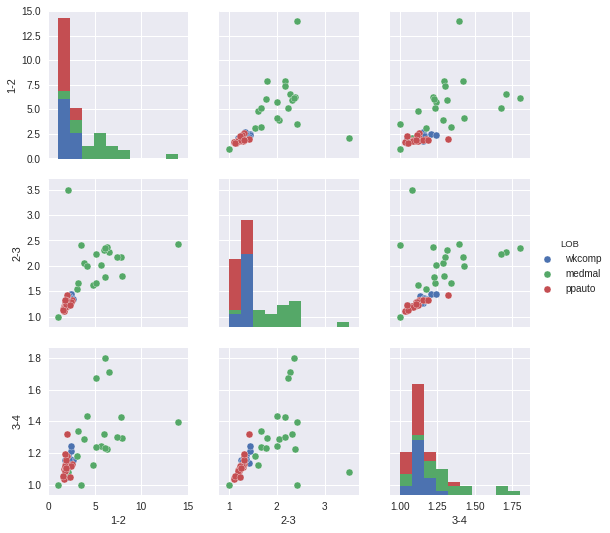

In [14]:
import seaborn as sns
%matplotlib inline
g = sns.pairplot(ldf.reset_index()[['LOB','1-2','2-3','3-4']], hue="LOB")

##### Robustness of train_test_split
Let's test the performance of our `KNeighborsClassifier` using a different random state.

In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=41)
# Exercise - What is our accuracy when we change our train_test_split
# random_state to 41?
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.65

##### Cross-validation
* `sklearn` provides a `cross_val_score` to test the accuracy of an estimator across multiple folds painting a truer picture of an estimators' efficacy than a simple train/test split.
* With `cross_val_score`, we don't really need to provide separate train and test sets.  Though, with enough data, it is sometimes instructive to have train/test and holdout 

In [16]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(knn, X, y, cv=5))

0.8333333333333334

##### Improving model accuracy with GridSearchCV

With `GridSearchCV`, we can feed a hyperparameter grid into our estimator to determine an 'optimal' set of hyperparameters to use for our particular business problem.  `GridSearchCV` itself is an estimator and so it has the usual `'fit()` and `predict()` methods any other classifier would.

At a minimum, parameterizing the GridSearchCV estimator we need to specify:
1. The estimator we want to use
2. The hyperparameter searchspace as a dictionary

Optionally, we can also specify:
1. The number of folds to use

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':[1,3,5,7,9,11]}
grid = GridSearchCV(knn, param_grid, cv=5, refit=True)
grid.fit(X, y)
print(f'Best Accuracy Score: {grid.best_score_}')
grid.best_estimator_

Best Accuracy Score: 0.8333333333333334


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

A Visual inspection of the cross-validated scores shows support for `n_neighbors=5`

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


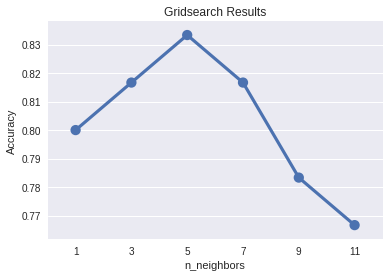

In [18]:
g = sns.pointplot(x=grid.cv_results_['param_n_neighbors'],
                  y=grid.cv_results_['mean_test_score']) \
       .set(xlabel='n_neighbors', ylabel='Accuracy', title='Gridsearch Results')

In [19]:
# Exercise - Explore values of KNeighborsClassifier hyperparameter, p to
# improve the cross-validated score of our estimator
param_grid=dict(n_neighbors=[1,3,5,7,9,11], p=[1,2,3,4,5,6])
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X, y)
print(f'Best Score: {grid.best_score_}')
grid.best_estimator_

Best Score: 0.8666666666666667


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='uniform')

In [20]:
# Exercise - Display the confusion matrix of your best estimator from the
# previous exercise on the entire dataset
pd.DataFrame(confusion_matrix(y, grid.best_estimator_.predict(X)),
             index=le.classes_, columns=le.classes_)

,medmal,ppauto,wkcomp
medmal,19,1,0
ppauto,0,17,3
wkcomp,0,3,17


### More complex workflows with Pipeline

The authors of `sklearn` recognize that composability of multiple estimators will be necessary to build the best models.  For example, you may want to cluster a feature before feeding it into a Regressor.

The `Pipeline` is useful for chaining one or more transformers together.  Pipelines themselves are estimators and have `fit()`, `predict()`, and `score()` function and can be used with all of the `sklearn` funcitons used for regular estimators including but not limited to: `cross_val_score`, `confusion_martix`

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

from sklearn.datasets import load_boston

# Regression Dataset
boston = load_boston()
    
# Polynomial Transformer
poly = PolynomialFeatures(degree=2) 

# Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)

# Set up Steps
steps=[('poly', poly), ('rf', rf)]

# Build a Pipeline
pipe = Pipeline(steps=steps) 

# Cross-Validation R-square
np.mean(cross_val_score(pipe, boston['data'], boston['target'], cv=5))

0.6212121548938733

In [22]:
# Exercise - Create a Pipeline with Principle Components Analysis (PCA) as a
# first step and the optimal KNeighbors hyperparameters (n_neighbors=3 and p=3)
from sklearn.decomposition import PCA

steps=[('pca', PCA()),
       ('knn',KNeighborsClassifier(n_neighbors=3, p=3))]

pipe = Pipeline(steps=steps)
np.mean(cross_val_score(pipe, X, y,cv=5))

0.85

#### Pipelines and GridSearchCV
Since a `Pipeline` is just another estimator `GridSearchCV` allows the hyperparameter space of all estimators in the pipeline to be gridsearched in one go.  

To avoid hyperparameter name clashes between one estimator and another within a pipeline, `sklearn` uses a double underscore naming convention of the form {estimator_name}__{hyperparameter} for the keys of its parameter grid.


In [23]:
param_grid = dict(rf__n_estimators=[10, 25],
                  rf__max_depth=[10, 15, 20],
                  rf__min_samples_split=[5, 10, 15],
                  poly__degree=[1, 2])

# Set up Steps
steps=[('poly', PolynomialFeatures()), ('rf', RandomForestRegressor())]

# Build a Pipeline
pipe = Pipeline(steps=steps) 

# Hyperparameter grid
param_grid = dict(rf__n_estimators=[10, 25],
                  rf__max_depth=[10, 15, 20],
                  rf__min_samples_split=[5, 10, 15],
                  poly__degree=[1, 2])

#Grid Search
grid = GridSearchCV(pipe, param_grid, cv=5, iid=True)
grid.fit(boston['data'], boston['target'])

print(f'Best R-square: {grid.best_score_}')
grid.best_estimator_

Best R-square: 0.6561007397131374


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [24]:
# Exercise - Use Pipeline and GridsearchCV to determine whether we achieve a
# better cross-validated accuracy using PCA and KNeighborsClassifier combined

param_grid=dict(knn__n_neighbors=[1,3,5,7,9,11],
                knn__p=[1,2,3,4,5,6],
                pca__n_components=[3, 5, 7, 9])

pipe = Pipeline(steps=[('pca', PCA()),
                       ('knn',KNeighborsClassifier())])

grid = GridSearchCV(pipe, param_grid, cv=5, refit=True)
grid.fit(X, y)

print(f'Best Score: {grid.best_score_}')
grid.best_estimator_

Best Score: 0.8666666666666667


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=6,
           weights='uniform'))])

### Scikit-Learn Recap

* Almost everything is an Estimator.  They all have a `fit` method and depending on the nature of the estimator may also have a `predict`, `score` or `transform` method.
* The API is standardized across estimator
* A transformer is a special type of estimator that trasnforms data for another Estimator
* Cross-validation with Grid Search helps in hyperparameter selection
* Pipelines are useful for composing a chain of Estimators.
* The documentation is a goldmine of information